In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy.integrate as integrate
from scipy.optimize import minimize_scalar

In [3]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

### Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

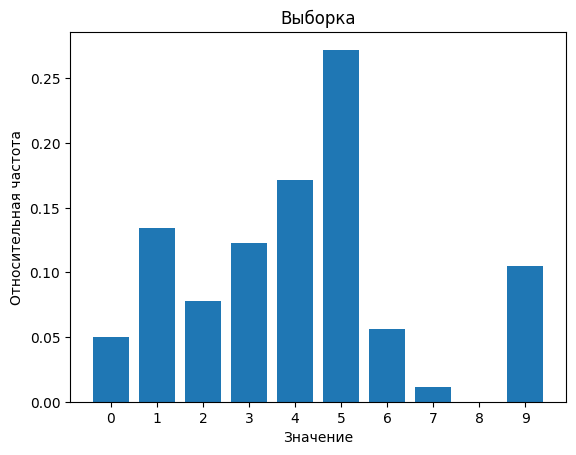

In [5]:
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
values = np.arange(10)

sorted_indices = np.argsort(weights)
sorted_weights = weights[sorted_indices]
sorted_values = values[sorted_indices]

sample = np.random.choice(values, size = 1000, p = weights/np.sum(weights))

plt.hist(sample, bins = np.arange(11) - 0.5, rwidth = 0.8, density = True)
plt.xticks(range(10))
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.title('Выборка')
plt.show()

### Задача 5
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$ с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

1


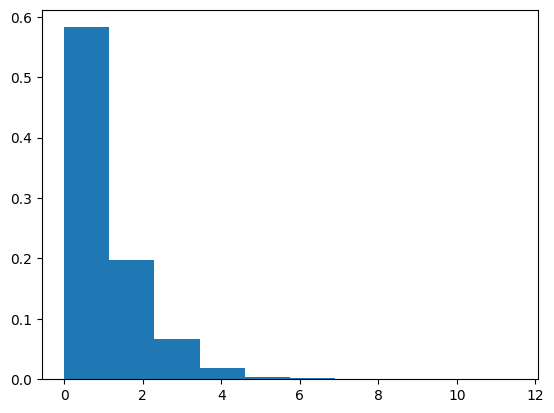

In [9]:
def Exp(lambda_):
    random = [math.log(lambda_ / rng()) / lambda_ for i in range(1000)]
    return random

lambda_ = int(input())
Exp(lambda_)
plt.hist(Exp(lambda_), density = True)
plt.show()

### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

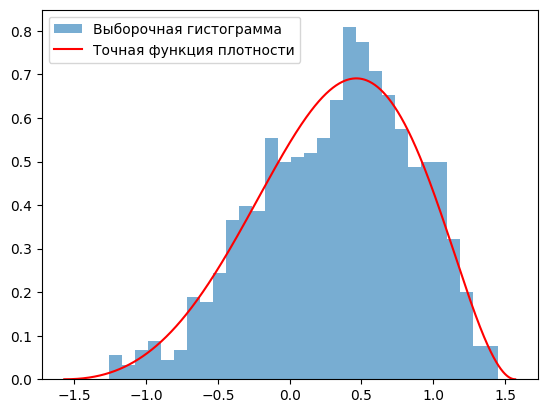

In [12]:
def density(x):
    return np.exp(x) * np.cos(x) ** 2

M = minimize_scalar(lambda x: -density(x), bounds = (-np.pi/2, np.pi/2), method = 'bounded').fun * -1

samples = []
while len(samples) < 1000:
    x = np.random.uniform(-np.pi/2, np.pi/2)
    y = np.random.uniform(0, M)
    if y <= density(x):
        samples.append(x)

def normalized_density(x):
    return density(x) / integral_value

integral_value, _ = integrate.quad(density, -np.pi/2, np.pi/2)

x_values = np.linspace(-np.pi/2, np.pi/2, 1000)
y_values = [normalized_density(x) for x in x_values]

plt.hist(samples, bins = 30, density = True, alpha = 0.6, label = "Выборочная гистограмма")
plt.plot(x_values, y_values, 'r', label = "Точная функция плотности")
plt.legend()
plt.show()

### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

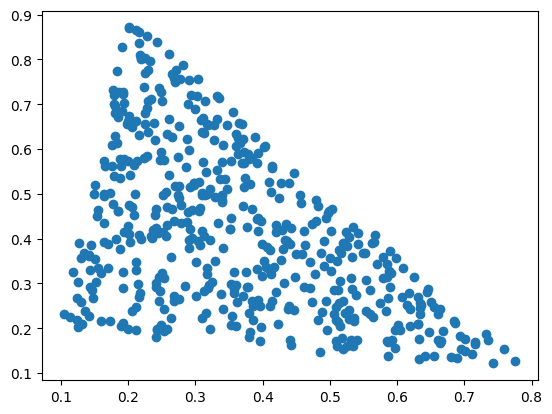

In [14]:
R = np.ones((2, 500))
for i in range(500):
    R[0,i] = rng()
    R[1,i] = rng()
    if R[0,i] + R[1,i] > 1:
        tmp = R[0,i]
        R[0,i] = R[0,i] - (R[0,i] + R[1,i] - 1)
        R[1,i] = R[1,i] - (tmp + R[1,i] - 1)
    tmp = R[0,i]
    R[0,i]= 0.7 * tmp+0.1 * R[1,i] + 0.1
    R[1,i]= -0.1 * tmp + 0.7 * R[1,i] + 0.2
R
plt.scatter(R[0,:], R[1,:])
plt.show()

### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

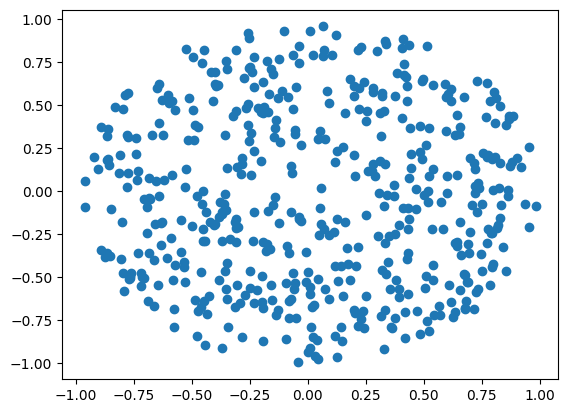

In [17]:
R = np.ones((2, 500))
a = []
b = []
for i in range(500):
    R[0,i] = rng() * 2 * 3.14
    R[1,i] = math.sqrt(rng())
    a.append(np.sin(R[0,i]) * R[1,i])
    b.append(np.cos(R[0,i])*  R[1,i])
plt.scatter(a, b)
plt.show()

### Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20,  -4],
       [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

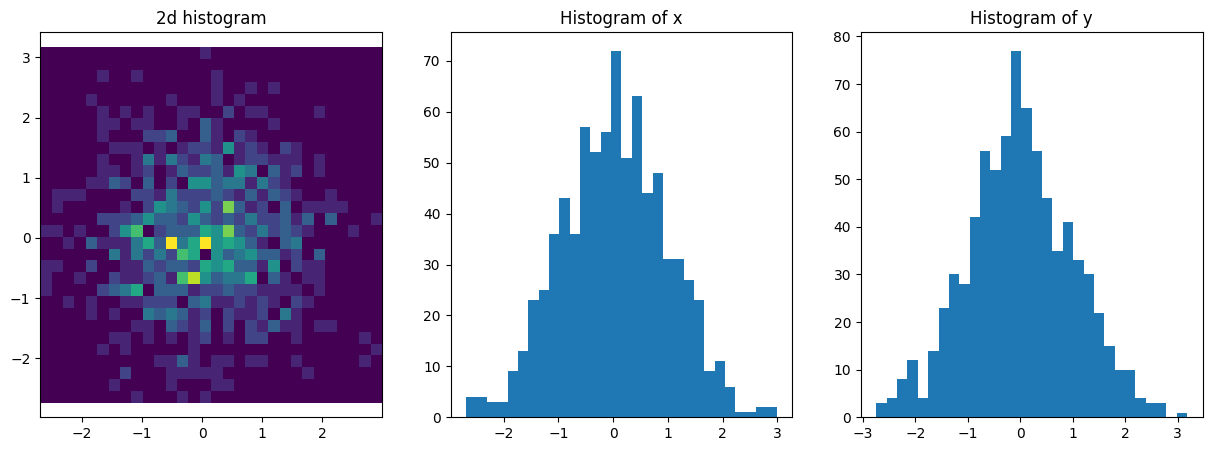

In [19]:
n = 1000
u1, u2 = (np.random.rand(2, n) - 0.5) * 2
s = u1 ** 2 + u2 ** 2
x = []
y = []
for i in range(1000):
    if (s[i] != 0) and (s[i] < 1):
        x.append(u1[i] * np.sqrt(-2 * np.log(s[i])/s[i]))
        y.append(u2[i] * np.sqrt(-2 * np.log(s[i])/s[i]))
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist2d(x, y, bins = 30)
ax[0].axis('equal')
ax[1].hist(x, bins = 30)
ax[2].hist(y, bins = 30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()